In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt



In [53]:
#visual configuration
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [54]:
sentiments = pd.read_csv("export/text_sent.csv")

In [55]:
sentiments.sample(3)

,tit,tex,tex_en,tok_en,sentiments,polaridad,subjetividad,neg,neu,pos,compound,num_pal
48,Miss Utopía,Estrenando Blog y abriendo nuevas vías con las...,Brandain blog and opening new ways with the wo...,brandain blog open new way word pablo aguer mi...,"[0.06818181818181818, 0.4772727272727273, 0.22...",0.068182,0.477273,0.222,0.778,0.000,-0.7717,505
14,La mochila de Mara,"Eso no era vida, se repitió por enésima vez a ...","That was not life, he repeated for the umpteen...",life repeat umpteenth time dismiss time look m...,"[0.2374183006535948, 0.5259259259259259, 0.121...",0.237418,0.525926,0.121,0.592,0.287,0.9974,5495
30,A destiempo,"Hace cinco años, tres meses y diecisiete días ...","Five years, three months ago and seventeen day...",year month ago seventeen day hour leave make t...,"[0.2, 0.54, 0.104, 0.659, 0.237, 0.8885]",0.200000,0.540000,0.104,0.659,0.237,0.8885,905


## Comparing polarity and subjectivity

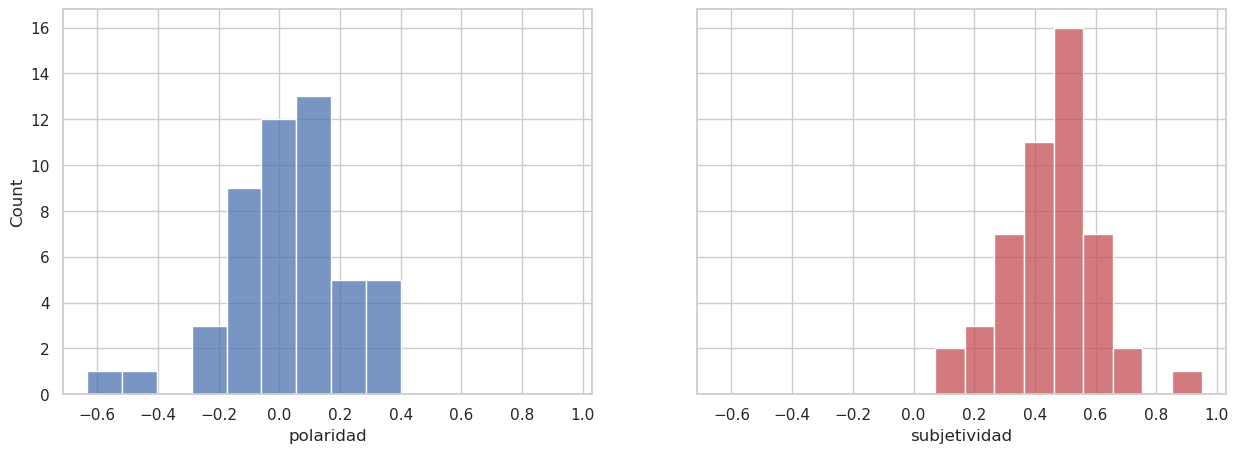

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5),sharey = True,sharex=True)
sns.histplot(sentiments["polaridad"],color = 'b',ax=axs[0])
sns.histplot(sentiments["subjetividad"],color = 'r',ax=axs[1])
plt.show(sns)

## Comparing negativity and positivity

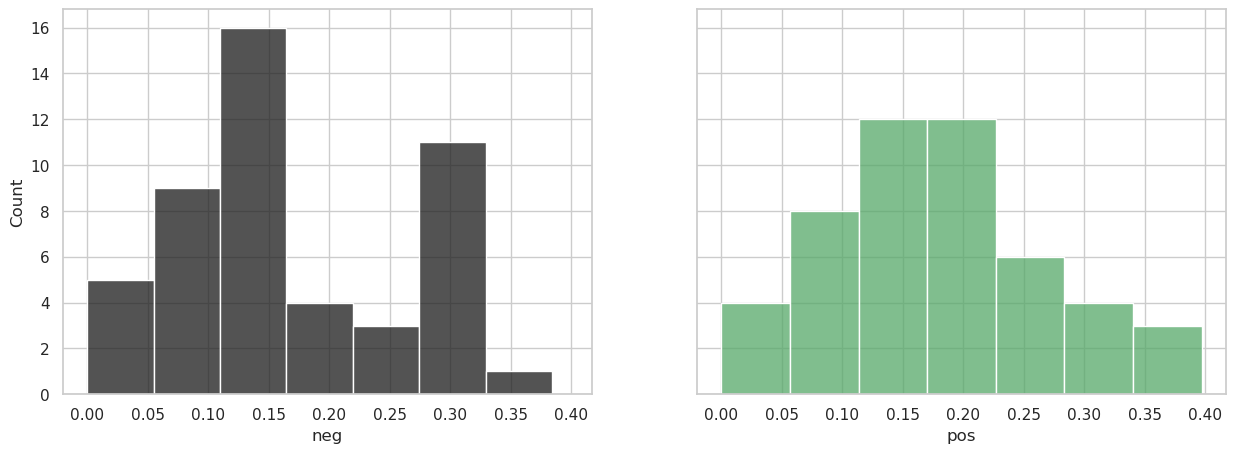

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5),sharey = True,sharex=True)
sns.histplot(sentiments["neg"],color = 'k',ax=axs[0])
sns.histplot(sentiments["pos"],color = 'g',ax=axs[1])
plt.show(sns)

## Correlation of the data

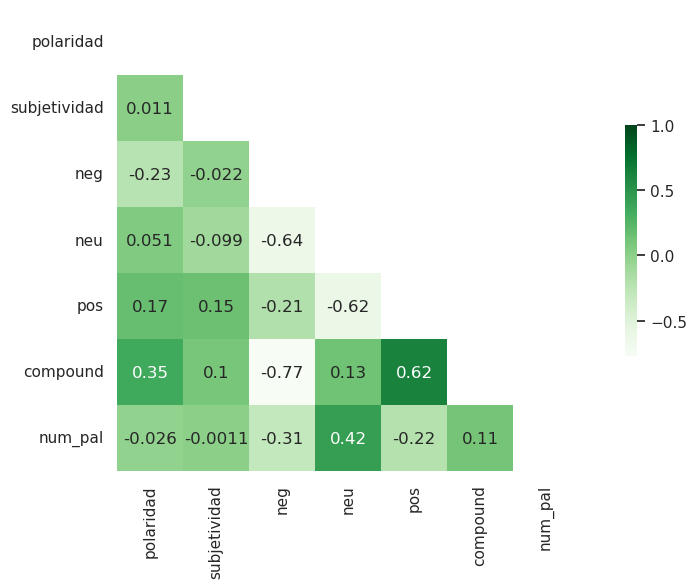

In [69]:
corr = sentiments.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            annot= True,
            cmap="Greens",
            square=True, #que los datos se vean como cuadrados
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);
plt.show(sns);

### focusing in the correlation of number of words (num_pal) and negativity, neutrality and positivity

In [74]:
sentiments.num_pal.mean()

1614.8367346938776

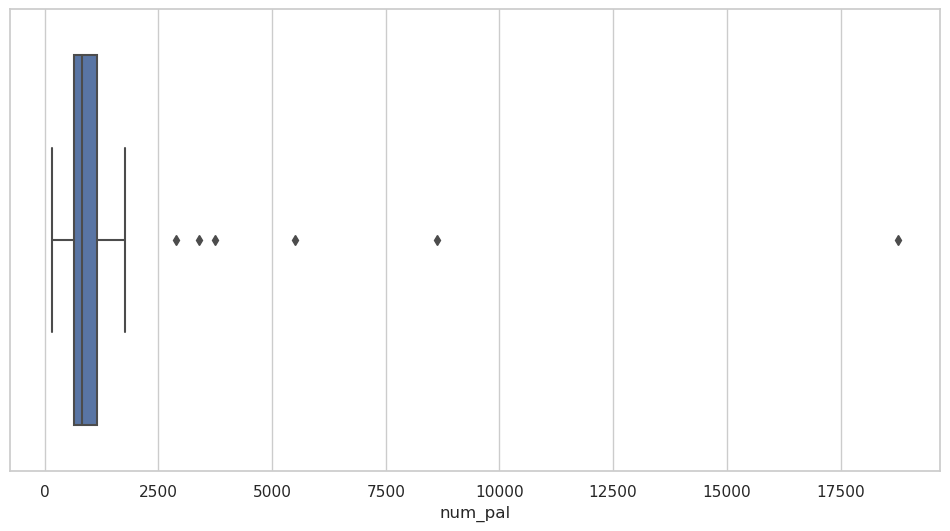

In [70]:
sns.boxplot(x="num_pal", data=sentiments)
plt.show(sns) 
#first we found the outlayers whith the number of words, we notice that most our texts concentrates in less than 2500 words. Rounding 1000
    # we decide to drop the rows that are less than the mean

In [75]:
words_sentiments = sentiments[sentiments["num_pal"]<sentiments.num_pal.mean()]

In [76]:
words_sentiments.shape

(39, 12)

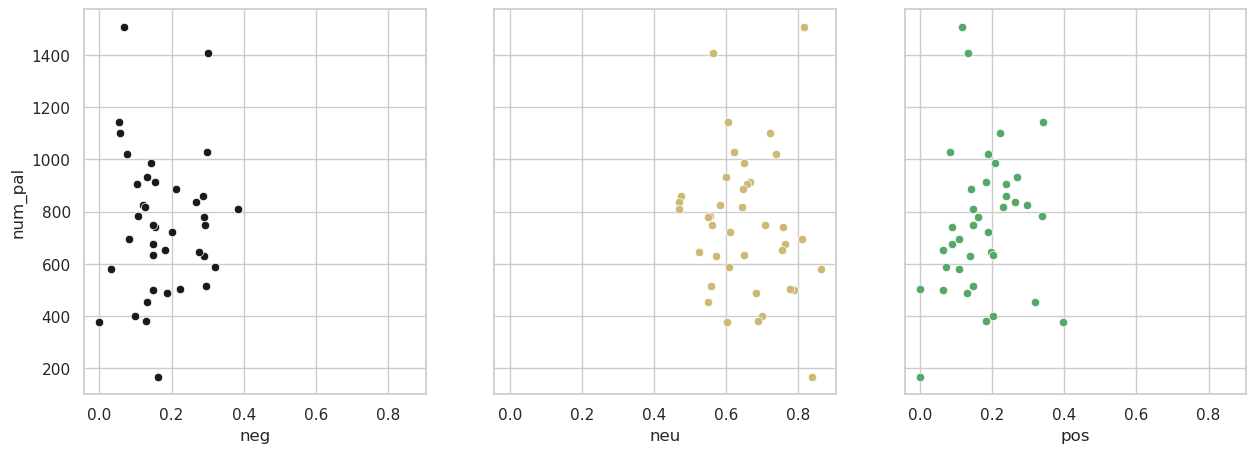

In [77]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5),sharey = True,sharex=True)
sns.scatterplot(y="num_pal", x="neg",color = 'k', data=words_sentiments,ax=axs[0]);
sns.scatterplot(y="num_pal", x="neu",color = 'y', data=words_sentiments,ax=axs[1]);
sns.scatterplot(y="num_pal", x="pos",color = 'g', data=words_sentiments,ax=axs[2]);
plt.show(sns)

In [ ]:
# we notice no correlation

# Conclusion
- As we see in the correlation of all of our features, there is a tendence to **neutrality and positivity** in our studied blog, so we recomend to post more happy thoughts than sad
![](https://c.tenor.com/3BFCgdfXm1MAAAAC/happy-thoughts-peter-pan.gif)
